In [32]:
import cv2
import pandas as pd
import os
import glob
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from scipy.ndimage import gaussian_filter1d

In [33]:
path_data = '../../DATA/1T/trajectories/1t_trajectories_data.pickle'
data = pd.read_pickle(path_data)
data

,inside_food_circle,inside_plume,animal,subdir,condition,inBox,mex,mey,lex,ley,...,shells_heights,shifted_heading_offset_angles,closest_peaks,distance_to_closest_peaks,convex_hull_coordinates,within_plume_list,within_fast_aligned_motion_box,within_fast_aligned_motion_box_idxs,in_plume_distances_to_closest_peaks,in_plume_speed_zscores
0,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",khorne,../../DATA/1T/trajectories\khorne\Food_not_eat...,Food_not_eaten,"[True, True, True, True, True, True, True, Tru...","[867.7782321352277, 868.4098868720093, 869.103...","[220.3760096390972, 222.62254504851472, 224.94...","[859.7916990734894, 860.442156655386, 861.1662...","[218.44241288276504, 220.4394524234994, 222.58...",...,"[[92.0, 205.3, 242.45, 168.35, 255.0, 80.45, 1...","[8.142816227815567, 8.879178515277461, 9.65239...","[8, 8, 8, 8, 17, 17, 17, 16, 16, 16, 16, 28, 2...","[0.14281622781556713, 0.8791785152774612, 1.65...","[[[[362 214]], [[364 215]], [[368 219]], [[384...","[257, 258, 259, 260, 261, 262, 263, 264, 265, ...","[False, False, False, False, False, False, Fal...","[268, 269, 270, 271, 272, 273, 319, 320, 321, ...","[-0.6879697255377435, 0.9062786569145569, -3.0...","[0.890045616091114, 1.0183667207415892, 1.2084..."
1,"[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",khorne,../../DATA/1T/trajectories\khorne\No_food_Cont...,No_food_Control,"[True, True, True, True, True, True, True, Tru...","[401.3909255130658, 403.8310148211872, 406.165...","[440.34594049593426, 440.4824909345147, 440.96...","[408.7892003231359, 411.0060588383548, 413.219...","[436.9547971787284, 436.8070729969831, 437.059...",...,"[[192.0, 255.0], [242.8, 255.0], [155.85, 255....","[67.2699226859054, 64.20685565090004, 62.07784...","[58, 57, 57, 57, 57, 57, 56, 56, 55, 55, 54, 5...","[9.2699226859054, 7.206855650900039, 5.0778413...","[[[[364 311]], [[345 361]], [[344 363]], [[343...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[False, False, False, False, False, False, Fal...",[],"[9.2699226859054, 7.206855650900039, 5.0778413...","[0.5323052922880918, 0.5026065553112394, 0.496..."
2,"[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",khorne,../../DATA/1T/trajectories\khorne\No_food_Cont...,No_food_Control,"[True, True, True, True, True, True, True, Tru...","[657.559289183019, 658.3439227389397, 659.9528...","[962.4270136912726, 957.2867360210096, 950.986...","[649.7691473232626, 650.6390723674978, 652.283...","[965.5508825641546, 960.0525758525707, 953.351...",...,"[[255.0, 116.55, 255.0, 129.7, 141.85, 28.0, 2...","[41.51949998786321, 40.5354605733971, 40.44219...","[42, 37, 38, 38, 34, 33, 33, 33, 32, 33, 35, 4...","[-0.48050001213678684, 3.5354605733971027, 2.4...","[[[[402 101]], [[404 102]], [[405 103]], [[422...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[True, False, True, True, False, False, False,...","[0, 2, 3, 104, 107, 218, 219, 220, 221, 222, 2...","[-0.48050001213678684, 3.5354605733971027, 2.4...","[1.9129923731451706, 2.5656317767274475, 2.964..."
3,"[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",khorne,../../DATA/1T/trajectories\khorne\No_food_Cont...,No_food_Control,"[True, True, True, True, True, True, True, Tru...","[559.7323709455363, 563.1621348289987, 565.898...","[964.6595078906078, 963.7740012767802, 963.078...","[559.3690616385084, 562.5784141925504, 565.259...","[955.8815683918298, 954.8029135622764, 953.953...",...,"[[255.0, 255.0, 117.1, 131.7, 255.0], [255.0, ...","[53.36294444206656, 52.925724130640376, 52.644...","[56, 52, 56, 57, 56, 56, 56, 56, 43, 43, 42, 4...","[-2.6370555579334365, 0.9257241306403756, -3.3...","[[[[300 256]], [[330 272]], [[359 306]], [[362...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[False, False, False, False, False, False, Fal...","[353, 354, 355, 3

In [34]:
data.columns

Index(['inside_food_circle', 'inside_plume', 'animal', 'subdir', 'condition',
       'inBox', 'mex', 'mey', 'lex', 'ley', 'rex', 'rey', 'bodyaxis_angle',
       'dx', 'dy', 'speed', 'zscore_speed', 'final_approach_indexes',
       'crossing_indexes', 'in_plume_feeding', 'heading_offset_angles',
       'trimmed_speed_zscores', 'shells', 'shells_peaks', 'shells_heights',
       'shifted_heading_offset_angles', 'closest_peaks',
       'distance_to_closest_peaks', 'convex_hull_coordinates',
       'within_plume_list', 'within_fast_aligned_motion_box',
       'within_fast_aligned_motion_box_idxs',
       'in_plume_distances_to_closest_peaks', 'in_plume_speed_zscores'],
      dtype='object')

In [35]:
animals = ['khorne', 'kratos', 'larsson', 'ninja', 'korra']

100%|██████████| 271/271 [00:00<00:00, 1603.55it/s]


Food_not_eaten ../../DATA/1T/trajectories\khorne\Food_not_eaten\0 155 155
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\0 251 251
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\1 336 336
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\10 609 609
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\11 379 379
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\12 365 365
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\13 0 0
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\14 221 221
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\15 585 585
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\16 383 383
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\17 339 339
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\18 330 330
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\19 0 0
No_food_Cont

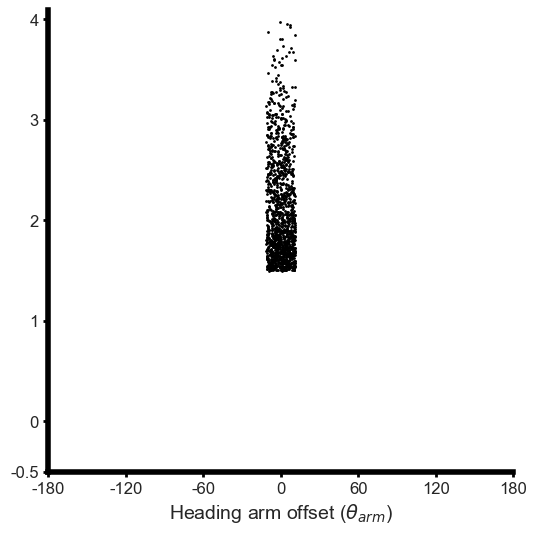

In [36]:
color_key = {'Food_eaten': '#D81B60',
                'Food_not_eaten': '#1E88E5',
               'No_food_Control': '#004D40'}

xticks = [-48, -32, -16, 0, 16, 32, 48]
xticklabels =[-180, -120, -60, 0, 60, 120, 180]

## high speed low offset trajs bounds
offset_bounds = [-3,3]
speed_bounds = [1.5,4]

def test_if_values_within_bounds (v0, v1, b0, b1):
    """
    v0 : float
    v1 : float
    b0 : list with 2 values, [min, max]
    b1 : list with 2 values, [min, max]
    """

    if (v0>=b0[0]) and (v0<=b0[1]) and (v1>=b1[0]) and (v1<=b1[1]):
        return True
    else:
        return False

distances_to_closest_peaks = []
speed_zscores = []

in_plume_distances_to_closest_peaks = []
in_plume_speed_zscores = []

withins_list = []
within_idxs_list = []
withins_plume_list = []

zmax = 4
zmin = -.5
yticks = [zmin, 0, 1, 2, 3, zmax]

pbar = tqdm(total=len(data), position=0, leave=True)
for i, row in enumerate(data.iloc[0:].iterrows()):

    tmptmp = row[1]
    app_idxs = tmptmp['final_approach_indexes']
    inPlume = tmptmp['inside_plume']
    inFood = tmptmp['inside_food_circle']

    ## get indexes where inPlume == True and inFood == False
    testIdxs = np.where((inPlume==True) & (inFood==False))[0]
    ## if there is a jump in the indexes, drop all indexes after the jump
    if np.any(np.diff(testIdxs) > 1):
        testIdxs = testIdxs[:np.where(np.diff(testIdxs) > 1)[0][0]+1]
    withins_plume_list.append(testIdxs)

    distance_to_closest_peaks = np.array(tmptmp['distance_to_closest_peaks'])[testIdxs[:-1]]
    speed_zscore = tmptmp['zscore_speed'][testIdxs[:-1]]

    in_plume_distances_to_closest_peaks.append(distance_to_closest_peaks.copy())
    in_plume_speed_zscores.append(speed_zscore.copy())

    ## get row indexes where distance_to_closest_peaks and speed_zscore are within bounds
    withins = []
    for i, (pk, sp) in enumerate(zip(distance_to_closest_peaks, speed_zscore)):
        within = test_if_values_within_bounds(pk, sp, offset_bounds, speed_bounds)
        withins.append(within)
    withins = np.array(withins)

    withins_list.append(withins)

    print(tmptmp['condition'], tmptmp['subdir'], len(withins), len(distance_to_closest_peaks))

    idxs_within = []
    for within, idx in zip(withins, testIdxs[:-1]):
        if within == True:
            idxs_within.append(idx)
    within_idxs_list.append(idxs_within)

    distance_to_closest_peaks = np.array(distance_to_closest_peaks)[withins == True]
    speed_zscore = np.array(speed_zscore)[withins == True]

    distances_to_closest_peaks = np.concatenate((distances_to_closest_peaks, distance_to_closest_peaks))
    speed_zscores = np.concatenate((speed_zscores, speed_zscore))

    pbar.update(1)
pbar.close()

fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.scatter(distances_to_closest_peaks, speed_zscores, s=1, color='black', alpha=1)

ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=12)

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontsize=12)


ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, color='black', width=2)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color='black', width=2)

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(4)
    ax.spines[axis].set_color('black')

ax.set_xlabel(r'Heading arm offset ($\theta_{arm}$)', fontsize=14)

plt.show(fig)
plt.close(fig)

data['within_plume_list'] = withins_plume_list
data['within_fast_aligned_motion_box'] = withins_list
data['within_fast_aligned_motion_box_idxs'] = within_idxs_list
data['in_plume_distances_to_closest_peaks'] = in_plume_distances_to_closest_peaks
data['in_plume_speed_zscores'] = in_plume_speed_zscores


100%|██████████| 271/271 [00:04<00:00, 57.45it/s]


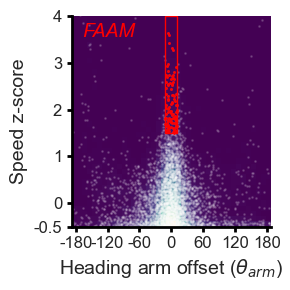

In [37]:
color_key = {'Food_eaten': '#D81B60',
                'Food_not_eaten': '#1E88E5',
               'No_food_Control': '#004D40'}


fig, ax = plt.subplots(1,1,figsize=(3,3))

## high speed low offset trajs bounds
offset_bounds = [-3, 3] ## +- 18 degrees motion off the arm axis
speed_bounds = [1.5,4] ## between 2-4 speed z-scores

def test_if_values_within_bounds (v0, v1, b0, b1):
    """
    v0 : float
    v1 : float
    b0 : list with 2 values, [min, max]
    b1 : list with 2 values, [min, max]
    """

    if (v0>=b0[0]) and (v0<=b0[1]) and (v1>=b1[0]) and (v1<=b1[1]):
        return True
    else:
        return False

def given_shell_peaks_return_shell(shell_peaks, shell_length=100, sigma=2):
    # Initialize the shell array
    shell = np.zeros((1, shell_length))

    # Set the peaks
    shell[0, shell_peaks] = 1

    # Apply 1D Gaussian blur
    blurred_shell = gaussian_filter1d(shell, sigma, mode='constant')

    return blurred_shell

zmax = 4
zmin = -.5

bins = [40,40]
rngx = [-50, 50]
rngy = [zmin, zmax]

xticks = [-48, -32, -16, 0, 16, 32, 48]
xticklabels =[-180, -120, -60, 0, 60, 120, 180]

cmap = 'viridis'
nsamp_scatter = 5000
coldots = 'white'

yticks = [zmin, 0, 1, 2, 3, zmax]

### empty lists to store data for umap ###
umap_window_size = 10 ## video @ 10hz, so 1 seconds
shells_list = []
row_index_dict = {i:0 for i in range(len(data))}
distances_to_closest_peaks_list = []
speed_zscores_list = []

### test ###
distances_to_closest_peaks = []
speed_zscores = []

pbar = tqdm(total=len(data), position=0, leave=True)
for i, row in enumerate(data.iloc[0:].iterrows()):

    row = row[1]
    condition = row['condition']
    app_idxs = row['final_approach_indexes']
    inPlume = row['inside_plume']
    inFood = row['inside_food_circle']

    ## get indexes where inPlume == True and inFood == False
    testIdxs = np.where((inPlume==True) & (inFood==False))[0]
    ## if there is a jump in the indexes, drop all indexes after the jump
    if np.any(np.diff(testIdxs) > 1):
        testIdxs = testIdxs[:np.where(np.diff(testIdxs) > 1)[0][0]+1]

    distance_to_closest_peaks = np.array(row['distance_to_closest_peaks'])
    speed_zscore = row['zscore_speed']

    shells = row['shells_peaks']
    shells = [given_shell_peaks_return_shell(shell, shell_length=100) for shell in shells]
    shells = np.array(shells)
    if len(shells) < umap_window_size:
        continue
    else:
        for j in range(0, len(shells)-umap_window_size, 1):
            shells_list.append(shells[j:j+umap_window_size])
            row_index_dict[i] += 1
            distances_to_closest_peaks_list.append(distance_to_closest_peaks[j:j+umap_window_size])
            speed_zscores_list.append(speed_zscore[j:j+umap_window_size])

    distance_to_closest_peaks = distance_to_closest_peaks[testIdxs[:-1]]
    speed_zscore = speed_zscore[testIdxs[:-1]]

    ## concatentate heading offset angles and speed zscores
    distances_to_closest_peaks = np.concatenate((distances_to_closest_peaks, distance_to_closest_peaks))
    speed_zscores = np.concatenate((speed_zscores, speed_zscore))

    pbar.update(1)
pbar.close()

## drop nans
speed_zscores = speed_zscores[~np.isnan(distances_to_closest_peaks)]
distances_to_closest_peaks = distances_to_closest_peaks[~np.isnan(distances_to_closest_peaks)]

## get row indexes where distance_to_closest_peaks and speed_zscore are within bounds
withins = []
for i, (pk, sp) in enumerate(zip(distances_to_closest_peaks, speed_zscores)):
    within = test_if_values_within_bounds(pk, sp, offset_bounds, speed_bounds)
    withins.append(within)
withins = np.array(withins)

ax.hist2d(distances_to_closest_peaks, speed_zscores, bins=bins, range=[rngx, rngy], cmap=cmap)
random_indices = np.random.choice(np.arange(len(distances_to_closest_peaks)), size=nsamp_scatter, replace=False)
ax.scatter(distances_to_closest_peaks[random_indices], speed_zscores[random_indices], s=1, color=coldots, alpha=0.15)

withins_R = []
for i, (pk, sp) in enumerate(zip(distances_to_closest_peaks[random_indices], speed_zscores[random_indices])):
    within = test_if_values_within_bounds(pk, sp, offset_bounds, speed_bounds)
    withins_R.append(within)
withins_R = np.array(withins_R)
ax.scatter(distances_to_closest_peaks[random_indices][withins_R], speed_zscores[random_indices][withins_R], s=1, color='red', alpha=1)

rect = patches.Rectangle((offset_bounds[0], speed_bounds[0]),
                         offset_bounds[1]-offset_bounds[0],
                         speed_bounds[1]-speed_bounds[0],
                         linewidth=1, edgecolor='red', facecolor='none')
ax.add_patch(rect)

ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=12)

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontsize=12)

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, color='black', width=2)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color='black', width=2)

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_color('black')

ax.set_ylabel('Speed z-score', fontsize=14)
ax.set_xlabel(r'Heading arm offset ($\theta_{arm}$)', fontsize=14)

target_dir = '../../DATA/1T/fast_arm_aligned_motions'
if os.path.exists(target_dir) != True:
    os.mkdir(target_dir)

## add text to the top left of the plot
text = 'FAAM'
text_color = 'red'
ax.text(0.05, 0.9, text, color=text_color, fontsize=14, transform=ax.transAxes, fontstyle='italic')

path_fig = os.path.join(target_dir, 'plots', 'arm_aligned_motion_subset.png')
fig.tight_layout()
fig.savefig(path_fig, dpi=300)

plt.show(fig)
plt.close(fig)


In [38]:
len(shells_list)

192499

we are going to use UMAP to visualize the data in 2D

In [39]:
shells_list = np.array(shells_list)
shells_list.shape

(192499, 10, 1, 100)

In [40]:
shells_list_flat = np.array([arr.flatten() for arr in shells_list])
mins, maxs = np.min(shells_list_flat), np.max(shells_list_flat)
shells_list_flat = (shells_list_flat - mins) / (maxs - mins)
mins, maxs = np.min(shells_list_flat), np.max(shells_list_flat)
shells_list_flat.shape, mins, maxs

((192499, 1000), 0.0, 1.0)

In [41]:
distances_to_closest_peaks_list = np.array(distances_to_closest_peaks_list)
## replace nans with 0
distances_to_closest_peaks_list = np.nan_to_num(distances_to_closest_peaks_list)
minp, maxp = np.min(distances_to_closest_peaks_list), np.max(distances_to_closest_peaks_list)
distances_to_closest_peaks_list = (distances_to_closest_peaks_list - minp) / (maxp - minp)
minp, maxp = np.min(distances_to_closest_peaks_list), np.max(distances_to_closest_peaks_list)
distances_to_closest_peaks_list.shape, minp, maxp

((192499, 10), 0.0, 1.0)

In [42]:
speed_zscores_list = np.array(speed_zscores_list)
minz, maxz = np.min(speed_zscores_list), np.max(speed_zscores_list)
speed_zscores_list = (speed_zscores_list - minz) / (maxz - minz)
minz, maxz = np.min(speed_zscores_list), np.max(speed_zscores_list)
speed_zscores_list.shape, minz, maxz

((192499, 10), 0.0, 1.0)

In [43]:
peaks_speeds_concat = [np.concatenate((distances_to_closest_peaks_list[i], speed_zscores_list[i])) for i in range(len(distances_to_closest_peaks_list))]
peaks_speeds_concat = np.array(peaks_speeds_concat)
peaks_speeds_concat.shape

(192499, 20)

In [44]:
minzp, maxzp = np.min(peaks_speeds_concat), np.max(peaks_speeds_concat)
minzp, maxzp

(0.0, 1.0)

use PCA to reduce the dimensionality of the shell data to 25

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
shells_list_flat_pca = pca.fit_transform(shells_list_flat)
shells_list_flat_pca = shells_list_flat_pca[:,:]
shells_list_flat_pca.shape

(192499, 25)

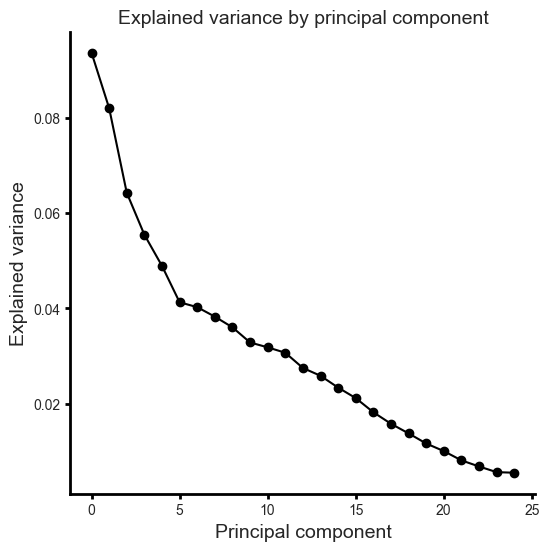

In [46]:
## show explained variance
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(pca.explained_variance_ratio_, marker='o', color='black')
ax.set_xlabel('Principal component', fontsize=14)
ax.set_ylabel('Explained variance', fontsize=14)
ax.set_title('Explained variance by principal component', fontsize=14)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, color='black', width=2)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color='black', width=2)
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_color('black')
plt.show(fig)
plt.close(fig)

In [47]:
import umap

umap_model = umap.UMAP(n_neighbors=100, min_dist=0, n_components=2, metric='euclidean', verbose=True, random_state=42)
shells_list_flat_umap = umap_model.fit_transform(shells_list_flat_pca)
shells_list_flat_umap.shape

UMAP(min_dist=0, n_neighbors=100, random_state=42, verbose=True)
Tue May 21 16:09:39 2024 Construct fuzzy simplicial set
Tue May 21 16:09:39 2024 Finding Nearest Neighbors
Tue May 21 16:09:39 2024 Building RP forest with 27 trees
Tue May 21 16:09:39 2024 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	 4  /  18
	Stopping threshold met -- exiting after 4 iterations
Tue May 21 16:11:19 2024 Finished Nearest Neighbor Search
Tue May 21 16:11:22 2024 Construct embedding


C:\Users\wlwee\anaconda3\envs\OOT\lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


Epochs completed:   0%|            0/200 [00:00]

Tue May 21 16:16:44 2024 Finished embedding


(192499, 2)

Saving figure to ../../DATA/1T/fast_arm_aligned_motions\plots\shells_umap.png


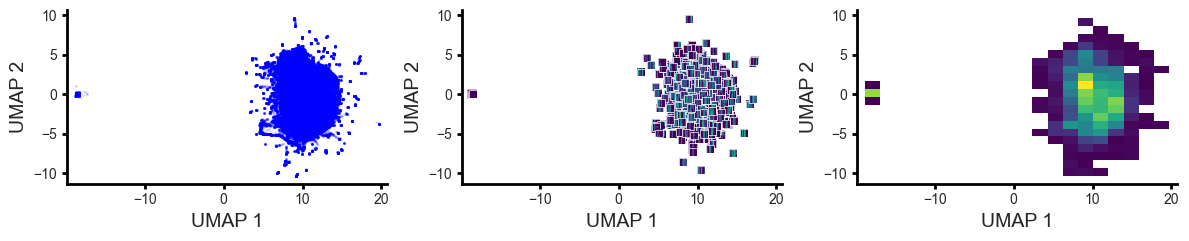

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

ax = axs[0]
ux = shells_list_flat_umap[:, 0]
uy = shells_list_flat_umap[:, 1]

xlim = [np.min(ux)-1, np.max(ux)+1]
ylim = [np.min(uy)-1, np.max(uy)+1]

sc = ax.scatter(ux, uy, color='blue', s=1, alpha=0.05)

ax.set_xlabel('UMAP 1', fontsize=14)
ax.set_ylabel('UMAP 2', fontsize=14)

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, color='black', width=2)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color='black', width=2)
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_color('black')

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_aspect('equal')

## show UMAP with sparse random subset of the input data arrays represented as images
## fix seed for reproducibility
ax = axs[1]
np.random.seed(42)

idxs = np.random.choice(np.arange(shells_list_flat.shape[0]), size=1000, replace=False)
shells_list_subset = shells_list[idxs]
shells_list_subset = [np.reshape(shell, (10, 100)) for shell in shells_list_subset]
shells_list_subset = [cv2.resize(shell, (100, 10), interpolation=cv2.INTER_NEAREST) for shell in shells_list_subset]
ux_ss = ux[idxs]
uy_ss = uy[idxs]

ex_pad = 0.5
ey_pad = 0.5
for xu, yu, shell in zip(ux_ss, uy_ss, shells_list_subset):
    ## center image on xu, yu
    extent = (xu-ex_pad, xu+ex_pad, yu-ey_pad, yu+ey_pad)
    ax.imshow(shell, extent=extent,
              cmap='viridis', alpha=1, zorder=3)
    ax.scatter(xu, yu, color='black', s=10, zorder=1, alpha=0)
    ## define a frame around the image
    rect = patches.Rectangle((xu-ex_pad, yu-ey_pad), 2*ex_pad, 2*ey_pad, linewidth=.5, edgecolor='white', facecolor='none', zorder=3)
    ax.add_patch(rect)

ax.set_xlabel('UMAP 1', fontsize=14)
ax.set_ylabel('UMAP 2', fontsize=14)

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, color='black', width=2)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color='black', width=2)
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_color('black')

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_aspect('equal')

## plot the 2D histogram of the UMAP
ax = axs[2]

g = ax.hist2d(ux, uy, bins=20, cmap='viridis', density=False, cmin=1)
ax.set_xlabel('UMAP 1', fontsize=14)
ax.set_ylabel('UMAP 2', fontsize=14)

img = g[0]

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, color='black', width=2)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color='black', width=2)
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_color('black')

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_aspect('equal')

fig.tight_layout()

path_fig = os.path.join(target_dir, 'plots', 'shells_umap.png')
print(f'Saving figure to {path_fig}')
fig.savefig(path_fig, dpi=300, bbox_inches='tight')

plt.show(fig)
plt.close(fig)

In [49]:
umap_model = umap.UMAP(n_neighbors=100, min_dist=0, n_components=2, metric='euclidean', verbose=True, random_state=42)
peaks_speeds_concat_umap = umap_model.fit_transform(peaks_speeds_concat)
peaks_speeds_concat_umap.shape

UMAP(min_dist=0, n_neighbors=100, random_state=42, verbose=True)
Tue May 21 16:17:04 2024 Construct fuzzy simplicial set
Tue May 21 16:17:04 2024 Finding Nearest Neighbors
Tue May 21 16:17:04 2024 Building RP forest with 27 trees
Tue May 21 16:17:04 2024 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	Stopping threshold met -- exiting after 3 iterations
Tue May 21 16:18:40 2024 Finished Nearest Neighbor Search
Tue May 21 16:18:43 2024 Construct embedding


C:\Users\wlwee\anaconda3\envs\OOT\lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


Epochs completed:   0%|            0/200 [00:00]

Tue May 21 16:23:47 2024 Finished embedding


(192499, 2)

In [50]:
u1, u2 = peaks_speeds_concat_umap[:, 0], peaks_speeds_concat_umap[:, 1]

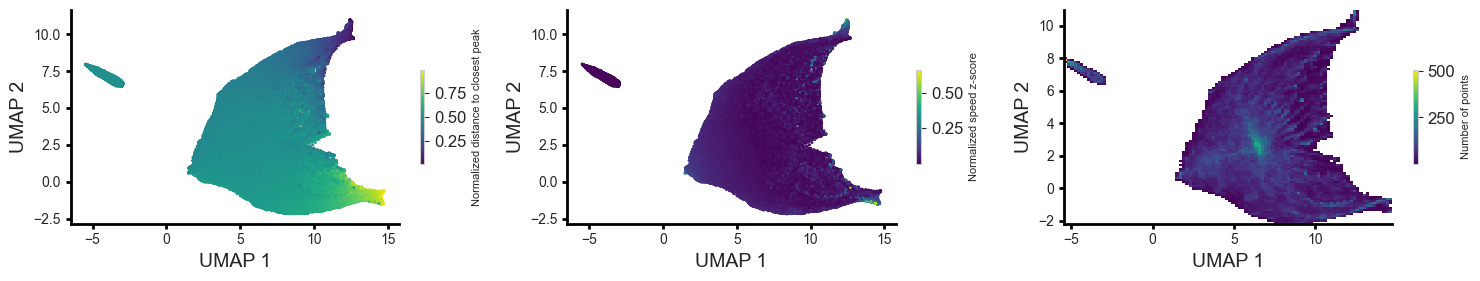

In [51]:
## show UMAP with the speed as color and absolute distance to closest peak as color
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sc = ax[0].scatter(u1, u2,
                   c=np.array([np.mean(np.abs(arr)) for arr in distances_to_closest_peaks_list]),
                   cmap='viridis', s=1)

cbar = fig.colorbar(sc, ax=ax[0], shrink=0.2)
cbar.set_label('Normalized distance to closest peak', fontsize=8)
cbar.ax.tick_params(labelsize=12)

ax[0].set_xlabel('UMAP 1', fontsize=14)
ax[0].set_ylabel('UMAP 2', fontsize=14)

ax[0].grid(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, color='black', width=2)
ax[0].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color='black', width=2)
for axis in ['bottom', 'left']:
    ax[0].spines[axis].set_linewidth(2)
    ax[0].spines[axis].set_color('black')

ax[0].set_aspect('equal')

sc = ax[1].scatter(u1, u2,
                   c=np.array([np.mean(arr) for arr in speed_zscores_list]),
                   cmap='viridis', s=1)

cbar = fig.colorbar(sc, ax=ax[1], shrink=0.2)
cbar.set_label('Normalized speed z-score', fontsize=8)
cbar.ax.tick_params(labelsize=12)

ax[1].set_xlabel('UMAP 1', fontsize=14)
ax[1].set_ylabel('UMAP 2', fontsize=14)

ax[1].grid(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, color='black', width=2)
ax[1].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color='black', width=2)
for axis in ['bottom', 'left']:
    ax[1].spines[axis].set_linewidth(2)
    ax[1].spines[axis].set_color('black')

ax[1].set_aspect('equal')

## 2d histogram
hb = ax[2].hist2d(u1, u2, bins=100, cmap='viridis', cmin=1)

## colorbar
cbar = fig.colorbar(hb[3], ax=ax[2], shrink=0.2)
cbar.set_label('Number of points', fontsize=8)
cbar.ax.tick_params(labelsize=12)

ax[2].set_xlabel('UMAP 1', fontsize=14)
ax[2].set_ylabel('UMAP 2', fontsize=14)

ax[2].grid(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, color='black', width=2)
ax[2].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color='black', width=2)
for axis in ['bottom', 'left']:
    ax[2].spines[axis].set_linewidth(2)
    ax[2].spines[axis].set_color('black')

ax[2].set_aspect('equal')

fig.tight_layout()

path_fig = os.path.join(target_dir, 'plots', 'speed_hoa_umap.png')
fig.savefig(path_fig, dpi=300, bbox_inches='tight')

plt.show(fig)
plt.close(fig)

In [52]:
## stack the umap embedding back into data using the row_index_dict
verbose = True
row_wise_u1, row_wise_u2 = [], []
n = 0
pbar = tqdm(desc='Stacking UMAP back into data', leave=True, position=0, total=len(row_index_dict))
for key, value in row_index_dict.items():
    u1_tmp, u2_tmp = [], []
    for i in range(n, n+value):
        u1_tmp.append(u1[i])
        u2_tmp.append(u2[i])
        n += 1
    if verbose:
        print(f'u1_tmp: {len(u1_tmp)}, u2_tmp: {len(u2_tmp)}')
    row_wise_u1.append(u1_tmp)
    row_wise_u2.append(u2_tmp)
    pbar.update(1)
pbar.close()

data['umap_1'] = row_wise_u1
data['umap_2'] = row_wise_u2

print(f'row_wise_u1: {len(row_wise_u1)}, row_wise_u2: {len(row_wise_u2)}')

Stacking UMAP back into data: 100%|██████████| 271/271 [00:00<00:00, 3265.15it/s]

u1_tmp: 402, u2_tmp: 402
u1_tmp: 644, u2_tmp: 644
u1_tmp: 326, u2_tmp: 326
u1_tmp: 710, u2_tmp: 710
u1_tmp: 1905, u2_tmp: 1905
u1_tmp: 723, u2_tmp: 723
u1_tmp: 1025, u2_tmp: 1025
u1_tmp: 758, u2_tmp: 758
u1_tmp: 615, u2_tmp: 615
u1_tmp: 711, u2_tmp: 711
u1_tmp: 566, u2_tmp: 566
u1_tmp: 631, u2_tmp: 631
u1_tmp: 604, u2_tmp: 604
u1_tmp: 452, u2_tmp: 452
u1_tmp: 603, u2_tmp: 603
u1_tmp: 476, u2_tmp: 476
u1_tmp: 525, u2_tmp: 525
u1_tmp: 623, u2_tmp: 623
u1_tmp: 617, u2_tmp: 617
u1_tmp: 348, u2_tmp: 348
u1_tmp: 371, u2_tmp: 371
u1_tmp: 692, u2_tmp: 692
u1_tmp: 390, u2_tmp: 390
u1_tmp: 39, u2_tmp: 39
u1_tmp: 246, u2_tmp: 246
u1_tmp: 620, u2_tmp: 620
u1_tmp: 233, u2_tmp: 233
u1_tmp: 426, u2_tmp: 426
u1_tmp: 564, u2_tmp: 564
u1_tmp: 613, u2_tmp: 613
u1_tmp: 414, u2_tmp: 414
u1_tmp: 790, u2_tmp: 790
u1_tmp: 1147, u2_tmp: 1147
u1_tmp: 640, u2_tmp: 640
u1_tmp: 1063, u2_tmp: 1063
u1_tmp: 474, u2_tmp: 474
u1_tmp: 656, u2_tmp: 656
u1_tmp: 925, u2_tmp: 925
u1_tmp: 220, u2_tmp: 220
u1_tmp: 574, u2_tmp

In [53]:
import json

path_animal_radius_key = r'../../DATA/1T/animal_radius_key'

with open(path_animal_radius_key, 'r') as json_file:
    animal_radius_key = json.load(json_file)

animal_radius_key

{'khorne': 66.59316781772738,
 'kratos': 85.43254649136945,
 'larsson': 52.478185944256886,
 'ninja': 92.19680037832116,
 'korra': 51.0404741357288}

In [54]:
target_dir = '../../DATA/1T/fast_arm_aligned_motions'
if os.path.exists(target_dir) != True:
    os.mkdir(target_dir)

## subdirs
video_dir = os.path.join(target_dir, 'videos')
if os.path.exists(video_dir) != True:
    os.mkdir(video_dir)
plot_dir = os.path.join(target_dir, 'plots')
if os.path.exists(plot_dir) != True:
    os.mkdir(plot_dir)

## subsubdirs
conditions = ['No_food_control', 'Food_eaten', 'Food_not_eaten']
for condition in conditions:
    vc_dir = os.path.join(video_dir, condition)
    pc_dir = os.path.join(plot_dir, condition)

    if os.path.exists(vc_dir) != True:
        os.mkdir(vc_dir)

    if os.path.exists(pc_dir) != True:
        os.mkdir(pc_dir)
        fig_dir = os.path.join(pc_dir, 'figures')
        if os.path.exists(fig_dir) != True:
            os.mkdir(fig_dir)
        projection_dir = os.path.join(pc_dir, 'projections')
        if os.path.exists(projection_dir) != True:
            os.mkdir(projection_dir)

In [55]:
data.columns

Index(['inside_food_circle', 'inside_plume', 'animal', 'subdir', 'condition',
       'inBox', 'mex', 'mey', 'lex', 'ley', 'rex', 'rey', 'bodyaxis_angle',
       'dx', 'dy', 'speed', 'zscore_speed', 'final_approach_indexes',
       'crossing_indexes', 'in_plume_feeding', 'heading_offset_angles',
       'trimmed_speed_zscores', 'shells', 'shells_peaks', 'shells_heights',
       'shifted_heading_offset_angles', 'closest_peaks',
       'distance_to_closest_peaks', 'convex_hull_coordinates',
       'within_plume_list', 'within_fast_aligned_motion_box',
       'within_fast_aligned_motion_box_idxs',
       'in_plume_distances_to_closest_peaks', 'in_plume_speed_zscores',
       'umap_1', 'umap_2'],
      dtype='object')

In [56]:
def rotate_point(px, py, origin_x, origin_y, angle_radians):
    """
    Rotates a point (px, py) about an origin (origin_x, origin_y) by angle_radians.

    :param px: x coordinate of the point to rotate
    :param py: y coordinate of the point to rotate
    :param origin_x: x coordinate of the origin
    :param origin_y: y coordinate of the origin
    :param angle_radians: angle in radians by which to rotate the point
    :return: The rotated point's coordinates as a tuple (new_x, new_y).
    """
    # Translate point to origin
    temp_x = px - origin_x
    temp_y = py - origin_y

    # Rotate point
    cos_angle = math.cos(angle_radians)
    sin_angle = math.sin(angle_radians)
    rotated_x = temp_x * cos_angle - temp_y * sin_angle
    rotated_y = temp_x * sin_angle + temp_y * cos_angle

    # Translate point back
    new_x = rotated_x + origin_x
    new_y = rotated_y + origin_y

    return new_x, new_y

import math
import cv2
import os
import glob

video_head = '*_ff.mp4'
ghost_plot_pad = 125
look_back = 0
step_by = 1

bodyaxis_R = 20
velocity_scalar = 10

n_frames_to_be_sequence = 5 ## 1/2 second of +-5 degree arm offset and 2-4 speed zscore

show = False
verbose = False
mask_circle = True

projection_type = 'max' ## ['std', 'max']

sequence_dict = {}

## we want to calculate the observation frequency of the sequences
## to do this for each condition we need to store the number of frames in each video
## and the number of frames in each sequence
## then we can calculate the total observation frequency for each condition
## by summing the number of video frames observed for each condition
## and then summing the number of sequence frames observed for each condition
## and dividing the number of sequence frames observed by the number of video frames observed

conditions = ['No_food_Control', 'Food_eaten', 'Food_not_eaten']
video_frames_by_condition = {}
sequence_frames_by_condition = {}
for condition in conditions:
    video_frames_by_condition[condition] = 0
    sequence_frames_by_condition[condition] = 0

n = 0
pbar = tqdm(total = data.shape[0], position=0, leave=True)
for row in data.iterrows():# data.iloc[230:231].iterrows():
    row = row[1]

    animal = row['animal']
    condition = row['condition']
    subdir = row['subdir']

    animal_radius = animal_radius_key[animal]

    mex = row['mex']
    mey = row['mey']
    body_axis_angle = row['bodyaxis_angle']

    dx = row['dx']
    dy = row['dy']

    distance_to_closest_peaks = np.array(row['distance_to_closest_peaks'])

    lex = row['lex']
    ley = row['ley']
    rex = row['rex']
    rey = row['rey']

    u1 = np.array(row['umap_1'])
    u2 = np.array(row['umap_2'])

    if verbose == True:
        print('starting shape')
        print(condition, subdir)
        print(f'animal = {animal}')
        print(f'animal_radius = {animal_radius}')
        print(f'mex.shape = {mex.shape}')
        print(f'mey.shape = {mey.shape}')
        print(f'body_axis_angle.shape = {body_axis_angle.shape}')
        print(f'dx.shape = {dx.shape}')
        print(f'dy.shape = {dy.shape}')
        print(f'distance_to_closest_peaks = {distance_to_closest_peaks.shape}')

        print(f'lex.shape = {lex.shape}')
        print(f'ley.shape = {ley.shape}')
        print(f'rex.shape = {rex.shape}')
        print(f'rey.shape = {rey.shape}')

        print(f'u1.shape = {u1.shape}')
        print(f'u2.shape = {u2.shape}')

        print()

    approach_idxs = row['final_approach_indexes']
    if condition != 'Food_eaten':
        mex = mex[approach_idxs[0]:approach_idxs[1]]
        mey = mey[approach_idxs[0]:approach_idxs[1]]
        body_axis_angle = body_axis_angle[approach_idxs[0]:approach_idxs[1]]
        dx = dx[approach_idxs[0]:approach_idxs[1]]
        dy = dy[approach_idxs[0]:approach_idxs[1]]
        distance_to_closest_peaks = distance_to_closest_peaks[approach_idxs[0]:approach_idxs[1]]
        distance_to_closest_peaks = distance_to_closest_peaks/50 * np.pi

        lex = lex[approach_idxs[0]:approach_idxs[1]]
        ley = ley[approach_idxs[0]:approach_idxs[1]]
        rex = rex[approach_idxs[0]:approach_idxs[1]]
        rey = rey[approach_idxs[0]:approach_idxs[1]]

        u1 = u1[approach_idxs[0]:approach_idxs[1]]
        u2 = u2[approach_idxs[0]:approach_idxs[1]]

        crossing_index = row['crossing_indexes']
    else:
        approach_idxs = approach_idxs - approach_idxs[0]
        mex = mex[approach_idxs[0]:approach_idxs[1]]
        mey = mey[approach_idxs[0]:approach_idxs[1]]
        body_axis_angle = body_axis_angle[approach_idxs[0]:approach_idxs[1]]
        dx = dx[approach_idxs[0]:approach_idxs[1]]
        dy = dy[approach_idxs[0]:approach_idxs[1]]
        distance_to_closest_peaks = distance_to_closest_peaks[approach_idxs[0]:approach_idxs[1]]
        distance_to_closest_peaks = distance_to_closest_peaks/50 * np.pi

        lex = lex[approach_idxs[0]:approach_idxs[1]]
        ley = ley[approach_idxs[0]:approach_idxs[1]]
        rex = rex[approach_idxs[0]:approach_idxs[1]]
        rey = rey[approach_idxs[0]:approach_idxs[1]]

        u1 = u1[approach_idxs[0]:approach_idxs[1]]
        u2 = u2[approach_idxs[0]:approach_idxs[1]]

        approach_idxs = row['final_approach_indexes']

    if verbose == True:
        print('trimming on condition')
        print('approach_idxs', approach_idxs)
        print(f'mex.shape = {mex.shape}')
        print(f'mey.shape = {mey.shape}')
        print(f'body_axis_angle.shape = {body_axis_angle.shape}')
        print(f'dx.shape = {dx.shape}')
        print(f'dy.shape = {dy.shape}')
        print(f'distance_to_closest_peaks = {distance_to_closest_peaks.shape}')

        print(f'lex.shape = {lex.shape}')
        print(f'ley.shape = {ley.shape}')
        print(f'rex.shape = {rex.shape}')
        print(f'rey.shape = {rey.shape}')

        print(f'u1.shape = {u1.shape}')
        print(f'u2.shape = {u2.shape}')

        print('crossing_index', crossing_index)

    video_frames_by_condition[condition] += mex.shape[0]

    motion_idxs = row['within_fast_aligned_motion_box_idxs']
    path_video = os.path.join(subdir, video_head)
    path_video = glob.glob(path_video)[0]

    if verbose == True:
        print('motion_idxs', motion_idxs)
        print()
    if len (motion_idxs) > 0:
        # Function to find consecutive sequences
        def find_consecutive_sequences(numbers, min_sequence_length=n_frames_to_be_sequence):
            sequences = []
            current_sequence = [numbers[0]]

            for number in numbers[1:]:
                if number == current_sequence[-1] + 1:
                    current_sequence.append(number)
                else:
                    if len(current_sequence) >= min_sequence_length:
                        sequences.append(current_sequence)
                    current_sequence = [number]

            if len(current_sequence) >= min_sequence_length:
                sequences.append(current_sequence)

            return sequences

        # Find consecutive sequences
        sequences = find_consecutive_sequences(motion_idxs)

        cap = cv2.VideoCapture(path_video)
        img_lists = []

        # Extracting frames
        for i, seq in enumerate(sequences):
            start_frame = max(seq[0] + 1 - look_back, 0)  # Padding start, ensuring it's not less than 0
            end_frame = seq[-1]

            xs = mex[start_frame:end_frame]
            ys = mey[start_frame:end_frame]
            bda = body_axis_angle[start_frame:end_frame]
            dX = dx[start_frame:end_frame]
            dY = dy[start_frame:end_frame]
            d2cp = distance_to_closest_peaks[start_frame:end_frame]

            ux_bda = bodyaxis_R*np.cos(bda) + xs
            uy_bda = bodyaxis_R*np.sin(bda) + ys

            LEX = lex[start_frame:end_frame]
            LEY = ley[start_frame:end_frame]
            REX = rex[start_frame:end_frame]
            REY = rey[start_frame:end_frame]

            ## check if start_frame and end_frame contain U1 and U2
            ## if not, fill in with nan
            if u1.shape[0] > end_frame:
                U1 = u1[start_frame:end_frame]
                U2 = u2[start_frame:end_frame]
                if verbose == True:
                    print(f'U1 and U2 are in the range of start_frame and end_frame U1.shape = {U1.shape}')
            elif u1.shape[0] >= start_frame and u1.shape[0] < end_frame:
                U1 = u1[start_frame:]
                U2 = u2[start_frame:]
                ## fill in with nan
                U1 = np.concatenate((U1, np.full(end_frame - u1.shape[0], np.nan)))
                U2 = np.concatenate((U2, np.full(end_frame - u1.shape[0], np.nan)))
                if verbose == True:
                    print(f'U1 partially in the range of start_frame and end_frame, U1.shape = {U1.shape}')
            else:
                ## just make nan array
                U1 = np.full(end_frame - start_frame, np.nan)
                U2 = np.full(end_frame - start_frame, np.nan)
                if verbose == True:
                    print(f'U1 and U2 are not in the range of start_frame and end_frame U1.shape = {U1.shape}')


            if verbose == True:
                print('trimming again, temporary variables')
                print(f'seq = {seq}')
                print(f'start_frame, end_frame = {start_frame}, {end_frame}')
                print(f'mex.shape = {xs.shape}')
                print(f'mey.shape = {ys.shape}')
                print(f'body_axis_angle.shape = {bda.shape}')
                print(f'dx.shape = {dX.shape}')
                print(f'dy.shape = {dY.shape}')
                print(f'distance_to_closest_peaks = {d2cp.shape}')
                print(f'distance_to_closest_peaks = {d2cp}; shape = {d2cp.shape}')

                print(f'lex.shape = {LEX.shape}')
                print(f'ley.shape = {LEY.shape}')
                print(f'rex.shape = {REX.shape}')
                print(f'rey.shape = {REY.shape}')

                print(f'u1.shape = {U1.shape}')
                print(f'u2.shape = {U2.shape}')
            xmin = np.min(xs)
            xmax = np.max(xs)
            ymin = np.min(ys)
            ymax = np.max(ys)

            if condition == 'Food_eaten':
                start_frame += approach_idxs[0]
                end_frame += approach_idxs[0]

            imgs = []
            for j in range(start_frame, end_frame):
                cap.set(cv2.CAP_PROP_POS_FRAMES, j)
                ret, frame = cap.read()
                if ret:
                    imgs.append(frame)
                else:
                    print(f'FAILED TO READ {j} {path_video}')
                    break  # Break if the frame couldn't be read (end of video, etc.)
            img_lists.append(imgs)

            seq_header = f'{seq[0]}-{seq[-1]}__'

            name_new_video = seq_header + 'FastArmAlignedMotion-' + str(i) + '-' + os.path.basename(path_video)
            path_new_video = os.path.join(target_dir, 'videos', condition, name_new_video)

            video = cv2.VideoWriter(path_new_video,
                                    cv2.VideoWriter_fourcc(*'mp4v'),
                                    10,
                                    (1920, 1200))

            for img in imgs:
                video.write(img)

            video.release()

            ## create the ghost plot by grabbing every third image and then taking the std
            idxs_ghost = []
            for j in range(1, len(imgs)+1, step_by):
                idxs_ghost.append(j-1)
            if verbose == True:
                print(f'idxs_ghost = {idxs_ghost}')
                print(f'len(imgs) = {len(imgs)}')

            xs = xs[idxs_ghost]
            ys = ys[idxs_ghost]
            ux_bda = ux_bda[idxs_ghost]
            uy_bda = uy_bda[idxs_ghost]
            dX = dX[idxs_ghost]
            dY = dY[idxs_ghost]
            TdV = np.arctan2(dY, dX)
            udX = np.cos(TdV)*animal_radius + xs
            udY = np.sin(TdV)*animal_radius + ys

            dX = dX*velocity_scalar + xs
            dY = dY*velocity_scalar + ys
            d2cp = d2cp[idxs_ghost]

            X_d2cp = []
            Y_d2cp = []
            for X,Y, DX, DY, T in zip(xs, ys, udX, udY, d2cp):
                rotated_point = rotate_point(DX, DY, X, Y, T)
                X_d2cp.append(rotated_point[0])
                Y_d2cp.append(rotated_point[1])

            LEX = LEX[idxs_ghost]
            LEY = LEY[idxs_ghost]
            REX = REX[idxs_ghost]
            REY = REY[idxs_ghost]

            ghost = np.array(imgs)[::step_by]
            if mask_circle == True:
                circle_coords = [(int(X),int(Y)) for X,Y in zip(xs, ys)]
                circle_radius = int(animal_radius)
                ## mask the ghost images where the circle inside is masked and the rest is left alone
                j = 0
                for img, coords in zip(ghost, circle_coords):
                    cv2.circle(img, coords, circle_radius, (15,15,15), -1)
                    ghost[j] = img
                    j += 1

            if projection_type == 'std':
                ghost = np.std(ghost, axis=0)
                ghost = ghost/np.max(ghost)
            if projection_type == 'max':
                ghost = np.max(ghost, axis=0)
                ghost = ghost/np.max(ghost)

            name_ghost_image = seq_header + str(n) + '-FastArmAlignedMotion-' + animal + '-' + str(i) + '-' + os.path.basename(path_video).split('.')[0] + '.png'
            path_ghost = os.path.join(target_dir, 'plots', condition, name_ghost_image)

            if verbose:
                print(name_ghost_image)

            sequence_dict[f'{n}_{i}'] = [animal, condition, subdir, seq,
                                         xs, ys, ux_bda, uy_bda, dX, dY, TdV, udX, udY,
                                         d2cp, X_d2cp, Y_d2cp, LEX, LEY, REX, REY, ghost, path_ghost,
                                         U1, U2]


            sequence_frames_by_condition[condition] += xs.shape[0]

            fig, ax = plt.subplots(1,1,figsize=(24,12))

            ax.imshow(ghost, vmin=0, vmax=.001, zorder=1)

            #ax.scatter(xs, ys, s=40, color='blue')

            for X, Y in zip(xs, ys):
                circle = plt.Circle((X, Y), animal_radius, color='red', fill=False, alpha=0.2)
                ax.add_patch(circle)

            for X, Y, BX, BY in zip(xs, ys, ux_bda, uy_bda):
                #ax.plot([X, BX], [Y, BY], color='magenta',  alpha=0.5)
                ax.arrow(X, Y, BX - X, BY - Y, head_width=2, head_length=7, fc='magenta', ec='magenta', alpha=0.3)

            for lx, ly, rx, ry in zip(LEX, LEY, REX, REY):
                ax.plot([lx, rx], [ly, ry], color='magenta',  alpha=0.3)

            for X, Y, DX, DY in zip(xs, ys, dX, dY):
                ax.arrow(X, Y, DX - X, DY - Y, head_width=2, head_length=7, fc='green', ec='green', alpha=0.75)

            for X, Y, AX, AY in zip(xs, ys, X_d2cp, Y_d2cp):
                #ax.plot([X, AX], [Y, AY], color='red',  alpha=0.75)
                ax.arrow(X, Y, AX - X, AY - Y, head_width=2, head_length=7, fc='red', ec='red', alpha=0.75)

            ax.grid(color='white')
            ax.set_xticks([])
            ax.set_yticks([])

            ax.set_xlim(int(xmin)-ghost_plot_pad,int(xmax)+ghost_plot_pad)
            ax.set_ylim(int(ymin)-ghost_plot_pad, int(ymax)+ghost_plot_pad)

            name_fig = 'plot_' + name_ghost_image
            path_fig = os.path.join(target_dir, 'plots', condition, 'figures', name_fig)

            fig.savefig(path_fig, dpi=300, bbox_inches='tight')

            if show == True:
                plt.show(fig)
            plt.close(fig)

            path_ghost = os.path.join(target_dir, 'plots', condition, 'projections', name_ghost_image)

            if projection_type == 'std':
                ghost = ghost[int(ymin)-ghost_plot_pad: int(ymax)+ghost_plot_pad, int(xmin)-ghost_plot_pad:int(xmax)+ghost_plot_pad]
                ghost = (ghost*255).astype('uint8')
            if projection_type == 'max':
                ghost = ghost[int(ymin)-ghost_plot_pad: int(ymax)+ghost_plot_pad, int(xmin)-ghost_plot_pad:int(xmax)+ghost_plot_pad]
                ghost = (ghost*255).astype('uint8')
            cv2.imwrite(path_ghost, ghost)
        cap.release()
    n += 1
    pbar.update(n=1)
pbar.close()

## make sequence dict into a dataframe, use variable names for the column names
df = pd.DataFrame.from_dict(sequence_dict, orient='index',
                            columns=['animal', 'condition', 'subdir', 'arm_lunge_idxs',
                                                                    'xs', 'ys', 'ux_bda', 'uy_bda', 'dX',
                                     'dY', 'TdV', 'udX', 'udY', 'd2cp', 'X_d2cp', 'Y_d2cp', 'LEX', 'LEY', 'REX', 'REY', 'ghost', 'path_ghost', 'U1', 'U2'])

100%|██████████| 271/271 [02:59<00:00,  1.51it/s]


100%|██████████| 112/112 [00:00<00:00, 13999.76it/s]


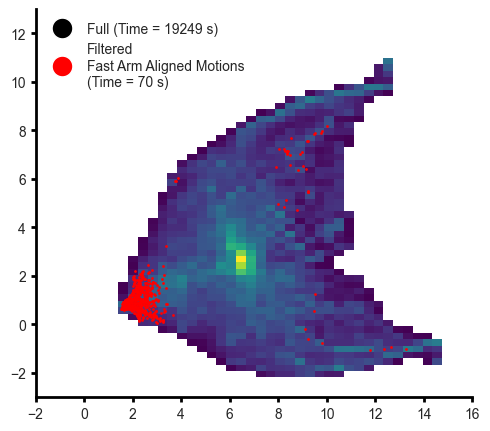

In [57]:


fig, ax = plt.subplots(1,1, figsize=(5,5))

u1, u2 = peaks_speeds_concat_umap[:, 0], peaks_speeds_concat_umap[:, 1]

u1_al, u2_al = np.array([]), np.array([])
pbar = tqdm(total = len(df), position=0, leave=True)
for row in df.iterrows():
    row = row[1]
    arm_lunge_idxs = row['arm_lunge_idxs']
    u1_tmp = row['U1']
    u2_tmp = row['U2']
    # drop nan values from u1 and u2 these will always be at the end of the sequence
    u1_tmp = u1_tmp[~np.isnan(u1_tmp)]
    u2_tmp = u2_tmp[~np.isnan(u2_tmp)]

    ## concatenate
    u1_al = np.concatenate([u1_al, u1_tmp])
    u2_al = np.concatenate([u2_al, u2_tmp])

    pbar.update(1)
pbar.close()

#ax.scatter(u1, u2, c='black', alpha=0.05, s=1, zorder=0, label='all')
ax.hist2d(u1, u2, bins=50, cmap='viridis', zorder=1, alpha=1, label='all', cmin=1)
ax.scatter(u1_al, u2_al, c='red', alpha=1, s=1, zorder=2, label='fast arm aligned motion')

ax.set_aspect('equal')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, color='black', width=2)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color='black', width=2)
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_color('black')
ax.set_xlim(-2, 16)
ax.set_ylim(-3, 13)

## define custom legend
custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor='black',
                       markersize=15, alpha=1, label=f'Full (Time = {int(u1.shape[0]/10)} s)'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='red',
                       markersize=15, alpha=1, label=f'Filtered\nFast Arm Aligned Motions\n(Time = {int(u1_al.shape[0]/10)} s)')]
ax.legend(handles=custom_lines, loc='upper left', fontsize=10, frameon=False)

fig.tight_layout()

path_fig = os.path.join(target_dir, 'plots', 'peaks_speeds_umap.png')
fig.savefig(path_fig, dpi=300, bbox_inches='tight')

plt.show(fig)
plt.close(fig)

In [58]:
data.columns

Index(['inside_food_circle', 'inside_plume', 'animal', 'subdir', 'condition',
       'inBox', 'mex', 'mey', 'lex', 'ley', 'rex', 'rey', 'bodyaxis_angle',
       'dx', 'dy', 'speed', 'zscore_speed', 'final_approach_indexes',
       'crossing_indexes', 'in_plume_feeding', 'heading_offset_angles',
       'trimmed_speed_zscores', 'shells', 'shells_peaks', 'shells_heights',
       'shifted_heading_offset_angles', 'closest_peaks',
       'distance_to_closest_peaks', 'convex_hull_coordinates',
       'within_plume_list', 'within_fast_aligned_motion_box',
       'within_fast_aligned_motion_box_idxs',
       'in_plume_distances_to_closest_peaks', 'in_plume_speed_zscores',
       'umap_1', 'umap_2'],
      dtype='object')

100%|██████████| 3/3 [00:00<00:00, 19.87it/s]


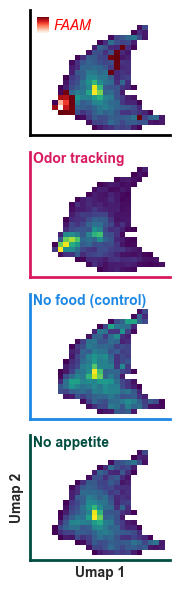

In [73]:
"""
color_key = {'Food_eaten': '#D81B60',
                'Food_not_eaten': '#1E88E5',
               'No_food_Control': '#004D40'}
"""

xlim = (-2, 16)
ylim = (-3, 13)

xticks = []
yticks = []

bins = 25

fig, axs = plt.subplots(4,1, figsize=(3,6), sharex=True)

## plot umap for all conditions
ax = axs[0]
ax.hist2d(u1, u2, bins=bins, cmap='viridis', alpha=1, label='all', cmin=1, zorder=0, range=[xlim, ylim])
ax.hist2d(u1_al, u2_al, bins=bins, cmap='Reds_r', alpha=1, label='all', cmin=2, zorder=1, range=[xlim, ylim])

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_aspect('equal')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, color='black', width=2)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color='black', width=2)
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_color('black')
ax.set_xlim(xlim)
ax.set_ylim(ylim)


## define custom legend in the top left corner
## legend will be a red rectangle with a top to bottom fade from white to red
## text will be 'Fast arm aligned motions'
red_box = np.zeros((100, 100, 1), dtype=np.uint8)
for i in range(100):
    red_box[i, :, :] = np.array([255]) - i*2.55
box_width = 2
box_x_pad = 1
box_y_pad = -1
box_extent = [xlim[0]+box_x_pad ,
              xlim[0]+box_x_pad+(box_width*.75),
              ylim[1]+box_y_pad-box_width,
              ylim[1]+box_y_pad]
text_location = [box_extent[1]+0.5, np.mean(np.array(box_extent[2:]))-.5]
text = 'FAAM'

ax.imshow(red_box, extent=box_extent, zorder=3, cmap='Reds')
ax.text(text_location[0], text_location[1], text, fontsize=10, color='Red', zorder=4, fontstyle='italic')

titles = ['Food eaten', 'No food (control)', 'No appetite']

n = 1
pbar = tqdm(total = len(conditions), position=0, leave=True)
for i, condition in enumerate(['Food_eaten', 'Food_not_eaten', 'No_food_Control']):
    axis_color = color_key[condition]
    u1_c, u2_c = np.array([]), np.array([])
    ax = axs[n+i]
    data_tmp = data[data['condition'] == condition]
    for row in data_tmp.iterrows():
        row = row[1]
        u1_c_tmp, u2_c_tmp = row['umap_1'], row['umap_2']

        ## concatenate
        u1_c = np.concatenate([u1_c, u1_c_tmp])
        u2_c = np.concatenate([u2_c, u2_c_tmp])

    ax.hist2d(u1_c, u2_c, bins=bins, cmap='viridis', zorder=1, alpha=1, label='all', cmin=1, range=[xlim, ylim])

    ax.set_aspect('equal')
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, color='black', width=2)
    ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color='black', width=2)
    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color(axis_color)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    if i == 2:
        ax.set_xlabel('Umap 1', fontsize=10, fontweight='bold')
        ax.set_ylabel('Umap 2', fontsize=10, fontweight='bold')

    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ## add text to the top left corner
    if condition == 'Food_eaten':
        text = 'Odor tracking'
    else:
        text = titles[i]
    ax.text(-1.5, 11.5, text, fontsize=10, fontweight='bold', color=axis_color)

    pbar.update(n=1)
pbar.close()

fig.tight_layout()

path_fig = os.path.join(target_dir, 'plots', 'umap_faam_behavior_space.png')
fig.savefig(path_fig, dpi=300, bbox_inches='tight')

plt.show(fig)
plt.close(fig)

Calculating convex hull areas:   0%|          | 0/271 [00:00<?, ?it/s]

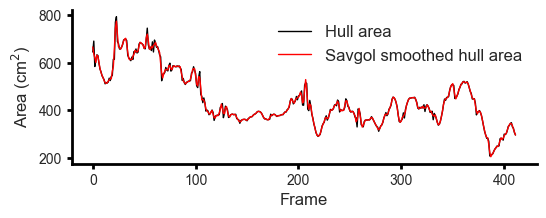

Normalizing convex hull areas: 100%|██████████| 271/271 [00:00<00:00, 5313.84it/s]


In [60]:
from scipy.signal import savgol_filter

def smooth_data_savgol(arr, window_size, poly_order):
    """
    Smooths the data using a Savitzky-Golay filter.

    :param data: The 1D numpy array of data to be smoothed.
    :param window_size: The size of the moving window. Must be an odd integer.
    :param poly_order: The order of the polynomial used to fit the samples. Must be less than window_size.
    :return: The smoothed data as a numpy array.
    """
    if window_size % 2 == 0:
        raise ValueError("Window size must be odd")

    if poly_order >= window_size:
        raise ValueError("Polynomial order must be less than window size")

    smoothed_data = savgol_filter(arr, window_size, poly_order)

    return smoothed_data

savgol_window_size, savgol_poly_order = 5, 2

area_conversion_factor = (1/(20**2))*(2.54**2)

hulls_areas = []
normalized_hulls_areas = []

by_animal_max_norm_area_dict = {animal:0 for animal in animals}

show = True
show_too = 1

## calculating the area of the convex hulls
n = 0
pbar = tqdm(total=len(data), desc='Calculating convex hull areas', position=0, leave=True)
for row in data.iloc[:].iterrows():
    row = row[1]

    animal = row['animal']
    animal_radius = animal_radius_key[animal]
    circle_area = np.pi*(animal_radius**2)*area_conversion_factor

    hulls = row['convex_hull_coordinates']
    hull_areas = []
    normalized_hull_areas = []
    for hull in hulls:
        if len(hull) > 2:
            hull = np.array(hull)
            hull_area = cv2.contourArea(hull)
            hull_area = hull_area*area_conversion_factor
            hull_areas.append(hull_area)
        else:
            hull_areas.append(0)
            normalized_hull_areas.append(0)

    smoothed_hull_areas = smooth_data_savgol(hull_areas, savgol_window_size, savgol_poly_order)
    normalized_hull_areas = smoothed_hull_areas/circle_area
    if np.max(normalized_hull_areas) > by_animal_max_norm_area_dict[animal]:
        by_animal_max_norm_area_dict[animal] = np.max(normalized_hull_areas)

    if show == True and n < show_too:
        fig, ax = plt.subplots(1,1,figsize=(6,2))

        ax.plot(np.arange(0, len(hull_areas), 1), hull_areas, color='black', linewidth=1, label='Hull area')
        ax.plot(np.arange(0, len(smoothed_hull_areas), 1), smoothed_hull_areas, color='red', linewidth=1, label='Savgol smoothed hull area')

        ax.set_xlabel('Frame', fontsize=12)
        ax.set_ylabel('Area (cm$^2$)', fontsize=12)

        ax.grid(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, color='black', width=2)
        ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color='black', width=2)

        for axis in ['bottom', 'left']:
            ax.spines[axis].set_linewidth(2)
            ax.spines[axis].set_color('black')

        ax.legend(loc='upper right', fontsize=12, frameon=False)

        plt.show(fig)
        plt.close(fig)

    hulls_areas.append(smoothed_hull_areas)
    normalized_hulls_areas.append(normalized_hull_areas)
    n += 1
    pbar.update(1)
pbar.close()

data['convex_hull_areas_cm2'] = hulls_areas
data['normalized_convex_hull_areas'] = normalized_hulls_areas

## dividing the normalized hull areas by the max normalized hull area for each animal
normalized_hulls_areas = []
pbar = tqdm(total=len(data), desc='Normalizing convex hull areas', position=0, leave=True)
for row in data.iloc[:].iterrows():
    row = row[1]
    animal = row['animal']
    normalized_hull_areas = row['normalized_convex_hull_areas']
    max_norm_area = by_animal_max_norm_area_dict[animal]
    normalized_hull_areas = [area/max_norm_area for area in normalized_hull_areas]
    ## make values < 0 equal to 0
    normalized_hull_areas = [0 if area < 0 else area for area in normalized_hull_areas]
    normalized_hulls_areas.append(normalized_hull_areas)
    pbar.update(1)
pbar.close()

del data['normalized_convex_hull_areas']
data['normalized_convex_hull_areas'] = normalized_hulls_areas

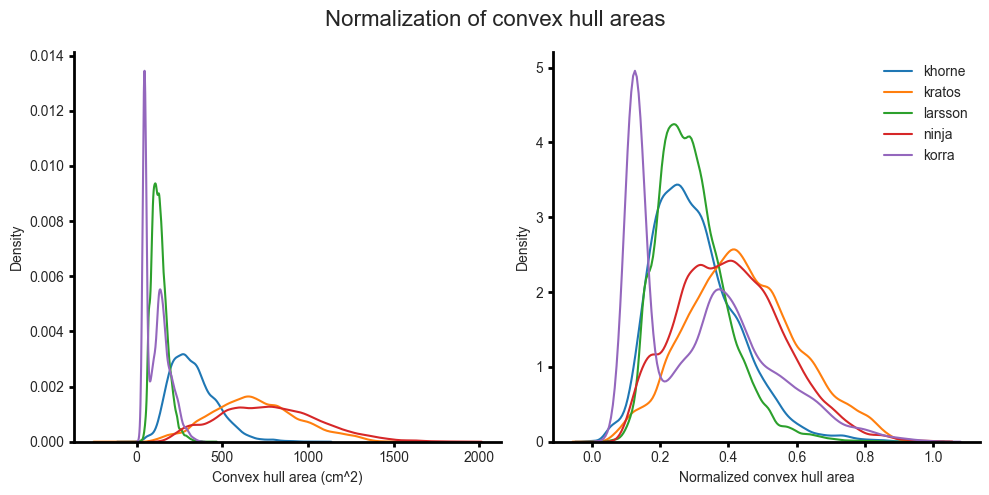

In [61]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress specific FutureWarnings from Seaborn and Pandas
warnings.simplefilter(action='ignore', category=FutureWarning)

# Your existing code for plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for animal in animals:
    animal_data = data[data['animal'] == animal]
    convex_hull_areas = [item for sublist in animal_data['convex_hull_areas_cm2'] for item in sublist]
    normalized_convex_hull_areas = [item for sublist in animal_data['normalized_convex_hull_areas'] for item in sublist]

    sns.kdeplot(convex_hull_areas, ax=axs[0], label=animal)
    sns.kdeplot(normalized_convex_hull_areas, ax=axs[1], label=animal)

ax=axs[0]
ax.set_xlabel('Convex hull area (cm^2)')
ax.set_ylabel('Density')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, color='black', width=2)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color='black', width=2)

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_color('black')

ax=axs[1]
ax.set_xlabel('Normalized convex hull area')
ax.set_ylabel('Density')
ax.legend(loc='upper right', frameon=False)

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, color='black', width=2)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color='black', width=2)

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_color('black')

fig.suptitle('Normalization of convex hull areas', fontsize=16)

path_fig = os.path.join(target_dir, 'plots', 'all_convex_hull_areas.png')
fig.tight_layout()
fig.savefig(path_fig, dpi=300)

plt.show(fig)
plt.close(fig)

# Optionally, reset warnings to default behavior after your plot code
warnings.resetwarnings()


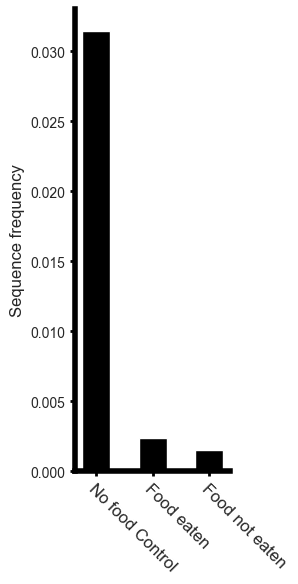

In [62]:
## visualize the sequence frequency per condition
fig, ax = plt.subplots(1,1, figsize=(2,6))

by_condition_sequence_frequency = {}
for condition in ['Food_eaten', 'Food_not_eaten', 'No_food_Control']:
    n_video_frames = video_frames_by_condition[condition]
    n_sequence_frames = sequence_frames_by_condition[condition]
    frequency = n_sequence_frames/n_video_frames
    by_condition_sequence_frequency[condition] = frequency

## plot the counts
ax.bar(conditions,
       by_condition_sequence_frequency.values(),
       color='black', alpha=1,
       width=0.5)

xticks = conditions
## remove '_' from the xticks
xlabs = [x.replace('_', ' ') for x in xticks]

ax.set_xticks(xticks)
ax.set_xticklabels(xlabs, rotation=-45, fontsize=12, rotation_mode="anchor", ha="left")

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, color='black', width=2)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color='black', width=2)

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(4)
    ax.spines[axis].set_color('black')

ax.set_ylabel('Sequence frequency', fontsize=12)

plt.show(fig)
plt.close(fig)

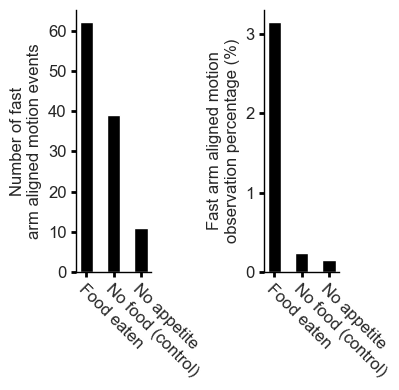

In [70]:
fig, axs = plt.subplots(1,2, figsize=(4,4))

ax = axs[0]
## making a bar plot of the number of sequences per condition
## get the counts per condition
counts = df['condition'].value_counts()
## get the conditions
conditions = counts.index
## get the counts
counts = counts.values
## plot the counts
ax.bar(conditions, counts, color='black', alpha=1,
       width=0.5)

yticks = [0, 10, 20, 30, 40, 50, 60]

ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=12)

xticks = conditions
## remove '_' from the xticks
xlabs = ['Food eaten', 'No food (control)', 'No appetite']
## replace No food Control with No food (control)
for i, xlab in enumerate(xlabs):
    if xlab == 'No food Control':
        xlabs[i] = 'No food (control)'

ax.set_xticks(xticks)
ax.set_xticklabels(xlabs, rotation=-45, fontsize=12, rotation_mode="anchor", ha="left")

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, color='black', width=2)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color='black', width=2)

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1)
    ax.spines[axis].set_color('black')

ax.set_ylabel('Number of fast\narm aligned motion events', fontsize=12)

ax = axs[1]
by_condition_sequence_frequency = {}
for condition in ['Food_eaten', 'Food_not_eaten', 'No_food_Control']:
    n_video_frames = video_frames_by_condition[condition]
    n_sequence_frames = sequence_frames_by_condition[condition]
    frequency = n_sequence_frames/n_video_frames
    by_condition_sequence_frequency[condition] = frequency*100

## plot the counts
ax.bar(conditions,
       by_condition_sequence_frequency.values(),
       color='black', alpha=1,
       width=0.5)

yticks = [0, 1, 2, 3]

ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=12)

xticks = conditions
## remove '_' from the xticks
xlabs = ['Food eaten', 'No food (control)', 'No appetite']

ax.set_xticks(xticks)
ax.set_xticklabels(xlabs, rotation=-45, fontsize=12, rotation_mode="anchor", ha="left")

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, color='black', width=2)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color='black', width=2)

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1)
    ax.spines[axis].set_color('black')

ax.set_ylabel('Fast arm aligned motion\nobservation percentage (%)', fontsize=12)

path_fig = os.path.join(target_dir, 'plots', 'arm_aligned_motion_freqs.png')
fig.tight_layout()
fig.savefig(path_fig, dpi=300)

plt.show(fig)
plt.close(fig)

In [64]:
path_plume_video = '../../DATA/1T/plume_bgsub_nozzleheight_1in_100ke_30g_10fps_01.mp4'

video = cv2.VideoCapture(path_plume_video)

frames = []
while True:
    ret, frame = video.read()
    if ret:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(frame)
    else:
        break
frames = np.array(frames[700:])

video.release()

In [65]:
frames_std = np.std(frames[::], axis=0)

psuedoaxis (1425.0, 592.5) length: 40


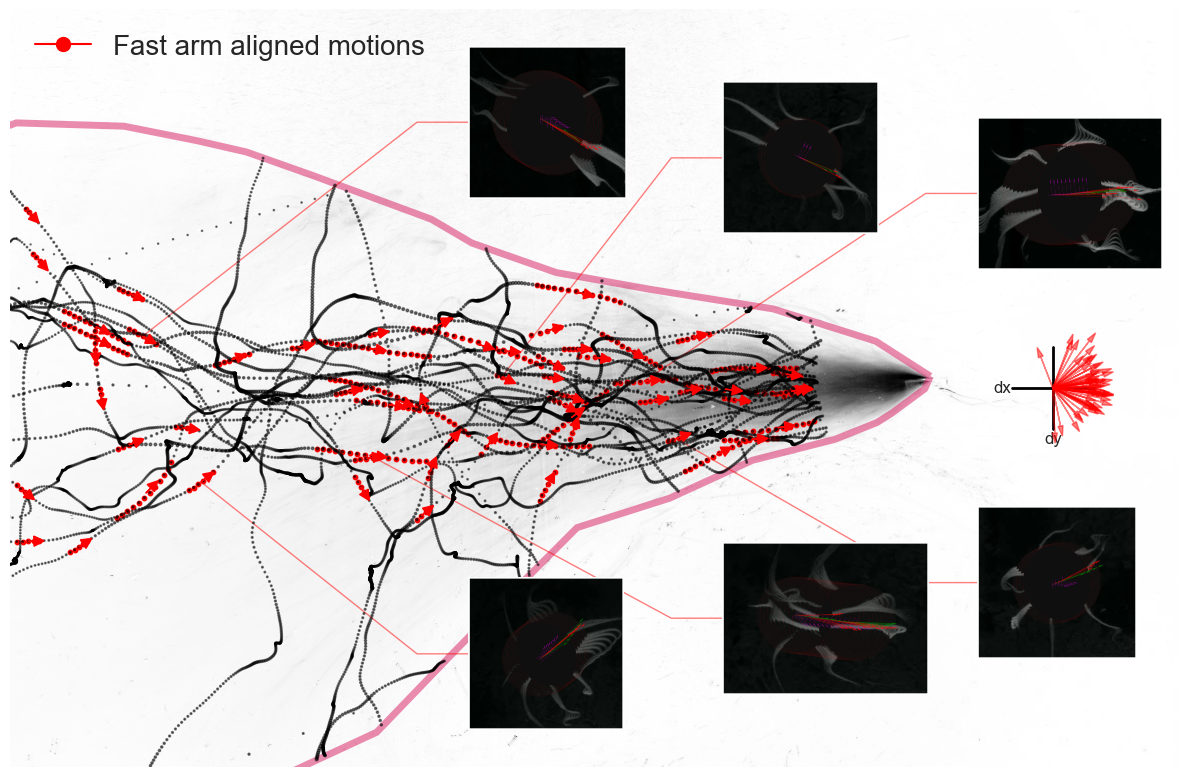

In [66]:
path_plume_polygon = '../../DATA/1T/plume_polygon.csv'

dat_polygon = pd.read_csv(path_plume_polygon)

x_verts = np.array(dat_polygon['axis-1'].tolist())
y_verts = np.array(dat_polygon['axis-0'].tolist())

plume_vertices = np.stack([x_verts, y_verts], axis=1)

xlim = (400, 1550)
ylim = (220, 965)

## random subset bounds
xbound = 300
ybound = (ylim[1]-ylim[0])/2

xbounds0 = (xlim[0], xlim[0]+xbound)
ybounds0 = (ylim[0], ylim[0]+ybound)

xbounds1 = xbounds0
ybounds1 = (ylim[1]-ybound, ylim[1])

xbounds2 = (xbounds0[1], xbounds0[1]+xbound)
ybounds2 = ybounds0

xbounds3 = xbounds2
ybounds3 = ybounds1

xbounds4 = (xbounds2[1], xbounds2[1]+xbound)
ybounds4 = ybounds2

xbounds5 = xbounds4
ybounds5 = ybounds3

xbounds = [xbounds0, xbounds1, xbounds2, xbounds3, xbounds4, xbounds5]
ybounds = [ybounds0, ybounds1, ybounds2, ybounds3, ybounds4, ybounds5]

## subset projection locations for each bounds
xp_shift = 300
yp_shift = 75
yd_shift = 35
xd_shift = 50
xp_bounds = []
yp_bounds = []
b = 0
tp, bp = 0, 0
for xbound, ybound in zip(xbounds, ybounds):

    ## if b is even multiply y by -1
    mod_y = 1
    if b % 2 == 0:
        mod_y = -1
        yd = tp
        tp += 1
    else:
        yd = bp
        bp += 1

    xd = -xd_shift*yd
    yd = -yd*mod_y*yd_shift

    xb = (xbound[1] + xbound[0])/2
    yb = (ybound[1] + ybound[0])/2

    xp_bounds.append(xb+xp_shift+xd)
    yp_bounds.append(yb+yp_shift*mod_y+yd)

    """print(b, b%2, yd,
          (xp_bounds[-1], yp_bounds[-1]),
          )"""

    b += 1

fig, ax = plt.subplots(1,1, figsize=(12,12))

poly = plt.Polygon(plume_vertices, facecolor='none', edgecolor='#D81B60', linewidth=5, alpha=0.5, zorder=1)
ax.add_patch(poly)

## we'll be plotting the average velocity vectors for the different fast arm aligned motions on psuedo axis within the plot
## defining the origin of the psuedo axis
xor = (xlim[1]+xlim[0])/2 + 450
yor = (ylim[1]+ylim[0])/2
axis_length = 40
or_vector_stretch = 7
print('psuedoaxis', (xor, yor), 'length:', axis_length)

## draw the axis
ax.plot([xor-axis_length, xor+axis_length], [yor, yor], color='black', linewidth=2, zorder=2)
ax.plot([xor, xor], [yor-axis_length, yor+axis_length], color='black', linewidth=2, zorder=2)
## psuedo axis labels
or_label_pad = 10
ax.text(xor-axis_length-or_label_pad, yor, 'dx', fontsize=12, ha='center', va='center', zorder=2)
ax.text(xor, yor+axis_length+or_label_pad, 'dy', fontsize=12, ha='center', va='center', zorder=2)

ax.imshow(frames_std, cmap='Greys', zorder=0, vmax=100)

for row in data[data['condition'] == 'Food_eaten'].iterrows():

    row = row[1]
    mex = row['mex']
    mey = row['mey']

    inPlume = row['inside_plume']
    inFood = row['inside_food_circle']

    ## get indexes where inPlume == True and inFood == False
    testIdxs = np.where((inPlume==True) & (inFood==False))[0]
    ## if there is a jump in the indexes, drop all indexes after the jump
    if np.any(np.diff(testIdxs) > 1):
        testIdxs = testIdxs[:np.where(np.diff(testIdxs) > 1)[0][0]+1]
    withins_plume_list.append(testIdxs)

    hull_areas = row['normalized_convex_hull_areas']
    hull_areas = np.array(hull_areas)[testIdxs[:-1]]

    approach_idxs = row['final_approach_indexes']
    approach_idxs = approach_idxs - approach_idxs[0]
    mex = mex[testIdxs[:-1]]
    mey = mey[testIdxs[:-1]]

    """ax.scatter(mex, mey, c=hull_areas, alpha=0.5, s=1, cmap='viridis', zorder=3,
               vmin=0, vmax=1)"""
    ax.scatter(mex, mey, s=(hull_areas)*5, zorder=3, alpha=0.5, c='black')

n = 0
bounds_seqs = [{} for _ in range(len(xbounds))]
for row in df[df['condition'] == 'Food_eaten'].iterrows():

    row = row[1]
    xs = row['xs']
    ys = row['ys']

    bxm = np.mean(xs)
    bym = np.mean(ys)

    seq = row['arm_lunge_idxs']
    subdir = row['subdir']

    ## check with bounds the sequence is in
    b = 0
    for xbound, ybound in zip(xbounds, ybounds):
        if (xbound[0] <= bxm <= xbound[1]) and (ybound[0] <= bym <= ybound[1]):
            bounds_seqs[b][subdir] = (subdir, bxm, bym, seq)
            break
        b += 1

    """tmp = data[data['subdir'] == subdir]
    hull_areas = tmp['normalized_convex_hull_areas'].tolist()[0]
    hull_areas = np.array(hull_areas)[seq[2:]]"""

    #print(f'subdir = {subdir}, ')

    ax.scatter(xs, ys, c='red', alpha=1, s=10, zorder=2,)

    dx = np.diff(xs)
    dy = np.diff(ys)
    dx_avg = np.mean(dx)
    dy_avg = np.mean(dy)
    ax.arrow(bxm, bym, dx_avg, dy_avg, head_width=10, head_length=10, fc='red', ec='red', zorder=3)
    ax.arrow(xor, yor, dx_avg*or_vector_stretch, dy_avg*or_vector_stretch,
             head_width=5, head_length=10, fc='red', ec='red', zorder=3, alpha=0.5)

    n += 1

## draw bounds as rectangles
"""b = 0
for xbound, ybound in zip(xbounds, ybounds):
    rect = patches.Rectangle((xbound[0], ybound[0]), xbound[1]-xbound[0], ybound[1]-ybound[0],
                             linewidth=2, edgecolor='orange', facecolor='none', zorder=4)
    ax.add_patch(rect)

    b += 1"""

## for each bound randomly select 1 sequence
random.seed(42)
projections_dir = os.path.join('..','..', 'DATA', '1T','fast_arm_aligned_motions',
                               'plots', 'Food_eaten', 'figures')
all_projections = glob.glob(os.path.join(projections_dir, '*.png'))
proj_y_extent_height = 150
for b in range(len(bounds_seqs)):
    bound_seqs = bounds_seqs[b]
    subdir, bxm, bym, seq = random.choice(list(bound_seqs.values()))

    #print(subdir, seq)

    seq_header = f'{seq[0]}-{seq[-1]}'
    animal = os.path.basename(os.path.dirname(os.path.dirname(subdir)))

    #print('\t', seq_header, animal)

    projections_subset = [p for p in all_projections if animal in p]
    projections_subset = [p for p in projections_subset if seq_header in p]

    if len(projections_subset) == 0:
        print('\t',f'No projections found for {animal} {seq_header}')
    elif len(projections_subset) == 1:
        path_projection = projections_subset[0]
        #print('\t',f'found 1 projection for {animal} {seq_header}')

        projection = cv2.imread(path_projection)
        projection = cv2.cvtColor(projection, cv2.COLOR_BGR2RGB)

        proj_x_extent_ratio = projection.shape[1] / projection.shape[0]
        proj_x_extent_length = proj_y_extent_height * proj_x_extent_ratio

        projection_location = xp_bounds[b], yp_bounds[b]

        ex0 = projection_location[0]
        ey0 = projection_location[1] - proj_y_extent_height/2
        ex1 = ex0 + proj_x_extent_length
        ey1 = ey0 + proj_y_extent_height

        """## draw location
        ax.scatter(projection_location[0], projection_location[1], c='blue', alpha=1, s=100, zorder=2,)
        ax.scatter(bxm, bym, c='blue', alpha=1, s=100, zorder=2,)"""

        ax.plot([bxm, projection_location[0]-50, projection_location[0]],
                [bym, projection_location[1], projection_location[1]], c='red', alpha=.5, lw=1, zorder=2,)

        ax.imshow(projection, extent=[ex0, ex1, ey0, ey1], zorder=5)

    else:
        print('\t',f'found {len(projections_subset)} projections for {animal} {seq_header}')

ax.set_xlim(xlim[0], xlim[1])
ax.set_ylim(ylim[1], ylim[0])

ax.grid(None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

## define custom legend
## red arrow with a dot in the middle for fast arm aligned motions
# Define a custom legend handle: a red line with a dot in the middle
custom_lines = [Line2D([0], [0], color='red', marker='o', markerfacecolor='red', markersize=10, label='Fast arm aligned motions')]

# Labels corresponding to the custom handles
custom_labels = ['Fast arm aligned motions']

# Create the legend with the custom handle and label
ax.legend(custom_lines, custom_labels, loc='upper left', frameon=False, fontsize=20)

path_fig = os.path.join(target_dir, 'plots', 'arm_aligned_motions_on_plume.png')
fig.tight_layout()
fig.savefig(path_fig, dpi=300)

plt.show(fig)
plt.close(fig)

In [67]:
df

,animal,condition,subdir,arm_lunge_idxs,xs,ys,ux_bda,uy_bda,dX,dY,...,X_d2cp,Y_d2cp,LEX,LEY,REX,REY,ghost,path_ghost,U1,U2
0_0,khorne,Food_not_eaten,../../DATA/1T/trajectories\khorne\Food_not_eat...,"[268, 269, 270, 271, 272, 273]","[841.1383954783164, 837.7143109952345, 834.631...","[501.01788983369414, 505.19721270053424, 509.5...","[857.0346304503056, 853.6750945714094, 850.756...","[488.88076852280227, 493.1451013653986, 497.71...","[806.8975506474978, 806.8892828794486, 805.461...","[542.811118502095, 548.733632925065, 552.05589...",...,"[803.2880338824305, 796.2197485173497, 792.424...","[555.8084011204187, 557.2822516730541, 561.060...","[835.2244863915408, 831.9020344731507, 828.974...","[493.2723226569037, 497.4999316952207, 501.840...","[847.0523045650921, 843.5265875173184, 840.289...","[508.76345701048456, 512.8944937058477, 517.26...","[[[0.0, 0.00392156862745098, 0.0], [0.0, 0.003...",../../DATA/1T/fast_arm_aligned_motions\plots\F...,"[2.5651324, 2.7830403, 2.8462837, 2.7417102]","[0.78737235, 0.7989503, 0.93622375, 1.2486043]"
0_1,khorne,Food_not_eaten,../../DATA/1T/trajectories\khorne\Food_not_eat...,"[319, 320, 321, 322, 323]","[714.6406345990501, 709.0583184531688, 703.827...","[570.8353452425854, 571.8690504518844, 572.355...","[731.3463122102145, 725.604752555599, 720.1086...","[559.838966950082, 560.6344824364272, 560.7390...","[658.8174731402366, 656.7539882599017, 655.696...","[581.1723973355754, 576.7317209772597, 572.523...",...,"[648.257759582759, 642.7580102289173, 637.3326...","[576.1234360673975, 578.1075702578358, 575.965...","[709.6698138818134, 703.9987750932825, 698.642...","[563.2836835812487, 564.4172818856553, 565.087...","[719.6114553162868, 714.117861813055, 709.0136...","[578.387006903922, 579.3208190181135, 579.6233...","[[[0.0, 0.00392156862745098, 0.0], [0.0, 0.003...",../../DATA/1T/fast_arm_aligned_motions\plots\F...,"[2.3233824, 2.4204826, 2.6511548]","[1.8468338, 2.2072728, 2.4385378]"
0_2,khorne,Food_not_eaten,../../DATA/1T/trajectories\khorne\Food_not_eat...,"[403, 404, 405, 406, 407]","[441.74481687626377, 435.6591795506442, 429.86...","[590.7074828053301, 591.260287066329, 591.5655...","[446.8437335196918, 440.18216940825175, 433.94...","[571.3683760766476, 571.7784349277879, 571.986...","[380.8884436200679, 377.7188089343654, 375.473...","[596.2355254153199, 594.3131956780844, 591.555...",...,"[375.2574144274754, 369.3123293481291, 363.484...","[594.4591911645781, 596.9826526789949, 586.249...","[434.6565081815464, 428.50003516913944, 422.61...","[588.8385911504923, 589.5981895821461, 590.052...","[448.8331255709811, 442.8183239321489, 437.119...","[592.5763744601677, 592.9223845505121, 593.078...","[[[0.0, 0.00392156862745098, 0.0], [0.0, 0.003...",../../DATA/1T/fast_arm_aligned_motions\plots\F...,"[nan, nan, nan]","[nan, nan, nan]"
2_0,khorne,No_food_Control,../../DATA/1T/trajectories\khorne\No_food_Cont...,"[218, 219, 220, 221, 222, 223, 224, 225, 226, ...","[777.946431069833, 774.2443742897156, 770.3611...","[678.715846134013, 674.0313180415224, 669.5443...","[771.7706540028079, 767.8398118921419, 763.677...","[659.6932338628656, 655.0845087983915, 650.694...","[740.9258632686584, 735.4119169086796, 731.072...","[631.8705652091069, 629.1612175836162, 626.050...",...,"[729.413037184744, 728.0880492263304, 723.5013...","[633.1180427001325, 626.0287800185894, 622.228...","[768.9227570537115, 765.4029658854683, 761.691...","[681.6454226955665, 677.0199664772986, 672.618...","[786.9701050859545, 783.0857826939628, 779.030...","[675.7862695724594, 671.0426696057461, 666.470...","[[[0.0, 0.00392156862745098, 0.0], [0.0, 0.003...",../../DATA/1T/fast_arm_aligned_motions\plots\N...,"[1.8390572, 1.928412, 1.9433361, 1.992048, 2.0...","[0.88520175, 0.91482174, 0.8984216, 0.8974479,..."
3_0,khorne,No_food_Control,../../DATA/1T/trajectories\khorne\No_food_Cont...,"[353, 354, 355, 356, 357, 358, 359]","[888.8631073588838, 892.0019842970194, 895.420...","[762.4544224179676, 757.38381117370